#STT: 16

#Họ và tên: Lưu Quang Tiến Hoàng

#Lớp: DS105.M11.2

#Buổi 03 - Lab5

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns

#Câu 1. Tạo dataframe (df) lưu trữ dataset tại đường dẫn trên (chọn cách đọc load từ internet). Xuất 10 samples bất kỳ. Dataset có bao nhiêu sample, số lượng bao nhiêu feature.

In [78]:
df = pd.read_csv('https://raw.githubusercontent.com/datasethub/ds105/master/Lab_Model_Development.csv')

In [79]:
df

,curb-weight,engine-size,length,width,horsepower,city-mpg,highway-mpg,wheel-base,bore,price
0,2548,130,0.811148,0.890278,111.0,21,27,88.6,3.47,13495.0
1,2548,130,0.811148,0.890278,111.0,21,27,88.6,3.47,16500.0
2,2823,152,0.822681,0.909722,154.0,19,26,94.5,2.68,16500.0
3,2337,109,0.848630,0.919444,102.0,24,30,99.8,3.19,13950.0
4,2824,136,0.848630,0.922222,115.0,18,22,99.4,3.19,17450.0
...,...,...,...,...,...,...,...,...,...,...
196,2952,141,0.907256,0.956944,114.0,23,28,109.1,3.78,16845.0
197,3049,141,0.907256,0.955556,160.0,19,25,109.1,3.78,19045.0
198,3012,173,0.907256,0.956944,134.0,18,23,109.1,3.58,21485.0
199,3217,145,0.907256,0.956944,106.0,26,27,109.1,3.01,22470.0


In [80]:
df.shape

(201, 10)

In [81]:
df.sample(10)

,curb-weight,engine-size,length,width,horsepower,city-mpg,highway-mpg,wheel-base,bore,price
97,2302,120,0.833253,0.905556,97.0,27,34,97.2,3.33,9549.0
20,1876,90,0.755887,0.886111,68.0,37,41,93.7,2.97,5572.0
75,2004,92,0.755887,0.894444,68.0,31,38,93.7,2.97,6669.0
112,3075,120,0.897165,0.950000,97.0,19,24,107.9,3.46,16630.0
139,2340,108,0.826526,0.908333,94.0,26,32,97.2,3.62,9960.0
193,3042,141,0.907256,0.933333,114.0,24,28,104.3,3.78,16515.0
170,2480,110,0.843825,0.923611,73.0,30,33,102.4,3.27,10698.0
9,2395,108,0.849592,0.900000,101.0,23,29,101.2,3.50,16430.0
123,2756,194,0.811629,0.902778,207.0,17,25,89.5,3.74,32528.0
29,1713,92,0.694858,0.887500,58.0,49,54,86.6,2.91,6479.0


#Câu 2. Kiểm tra kiểu dữ liệu của các feature ('curb-weight', 'engine-size', 'length' , 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore') trong dataset có bị khuyết giá trị nào không?

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   curb-weight  201 non-null    int64  
 1   engine-size  201 non-null    int64  
 2   length       201 non-null    float64
 3   width        201 non-null    float64
 4   horsepower   201 non-null    float64
 5   city-mpg     201 non-null    int64  
 6   highway-mpg  201 non-null    int64  
 7   wheel-base   201 non-null    float64
 8   bore         201 non-null    float64
 9   price        201 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 15.8 KB


In [83]:
df.isnull().sum()

curb-weight    0
engine-size    0
length         0
width          0
horsepower     0
city-mpg       0
highway-mpg    0
wheel-base     0
bore           0
price          0
dtype: int64

# Câu 3. Phát triển mô hình Polynomial Regression bậc 3 để dự đoán giá xe từ biến 'highway-mpg' (tên mô hình poly).

In [84]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [85]:
x =  df[['highway-mpg']]
y = df['price']

In [86]:
poly_reg = PolynomialFeatures(degree=3, include_bias= False)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression()

In [87]:
y_pred = lin_reg.predict(X_poly)

#Câu 4. Tính MSE và R^2 để đánh giá tập mẫu của mô hình poly bằng phương pháp thủ công. Có thể phát họa distribution plot để đánh giá mô hình được không?

Đánh giá bằng phương pháp thủ công

In [88]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [89]:
def r2(predictions,targets):
    corr_matrix = np.corrcoef( targets,predictions)
    corr = corr_matrix[0,1]
    return corr**2

In [90]:
np.sqrt(rmse(y_pred,y))

67.26690582112292

In [91]:
r2(y_pred,y)*100

67.41946663906533

Đánh giá bằng phương pháp gọi hàm

In [92]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,y_pred,squared=False)

In [93]:
np.sqrt(mse)

67.26690582112292

In [94]:
r_squared = lin_reg.score(X_poly, y)

In [95]:
r_squared * 100

67.4194666390652

Distribution plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


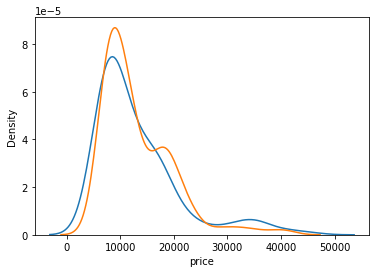

In [96]:
ax1 = sns.distplot(df['price'],hist = False, label = 'Actual Value')
sns.distplot(y_pred,hist = False, label = 'Fitted Values',ax = ax1)

#Câu 5. Phát triển mô hình hồi quy tuyến tính đa biến để dự đoán giá xe từ biến 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'.

In [97]:
x =  df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

In [98]:
poly_reg = PolynomialFeatures(degree=3, include_bias= False)
X_poly = poly_reg.fit_transform(x)
lin_reg1 = LinearRegression()
lin_reg1.fit(X_poly,y)

LinearRegression()

In [99]:
y_pred = lin_reg1.predict(X_poly)

#Câu 6. Tính MSE và R^2 để đánh giá tập mẫu của mô hình trên bằng phương pháp thủ công và gọi hàm. Có thể phát họa distribution plot để đánh giá mô hình được không?

Thủ công


In [100]:
np.sqrt(rmse(y_pred,y))

50.64412404945732

In [101]:
r2(y_pred,y)*100

89.53188125760434

Gọi hàm

In [102]:
mse = mean_squared_error(y,y_pred,squared=False)

In [103]:
np.sqrt(mse)

50.64412404945732

In [104]:
r_squared = lin_reg1.score(X_poly, y)
r_squared * 100

89.53188125760404

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


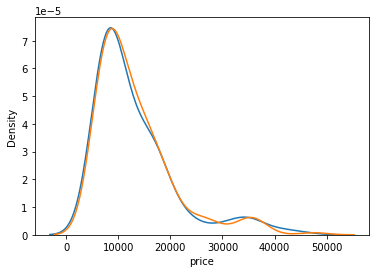

In [105]:
ax1 = sns.distplot(df['price'],hist = False, label = 'Actual Value')
sns.distplot(y_pred,hist = False,  label = 'Fitted Values',ax = ax1)

In [106]:
x =  df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

In [107]:
poly_reg = PolynomialFeatures(degree=2, include_bias= False)
X_poly = poly_reg.fit_transform(x)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y)

LinearRegression()

In [108]:
y_pred = lin_reg2.predict(X_poly)

#Câu 8. Tính MSE và R^2 để đánh giá tập mẫu của mô hình trên bằng phương pháp thủ công và gọi hàm. Có thể phát họa distribution plot để đánh giá mô hình được không?

Thủ công

In [109]:
np.sqrt(rmse(y_pred,y))

55.74503741251856

In [110]:
r2(y_pred,y)*100

84.63341969864737

Gọi hàm

In [111]:
mse = mean_squared_error(y,y_pred,squared=False)

In [112]:
np.sqrt(mse)

55.74503741251856

In [113]:
r_squared = lin_reg2.score(X_poly, y)
r_squared * 100

84.63341969864729

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


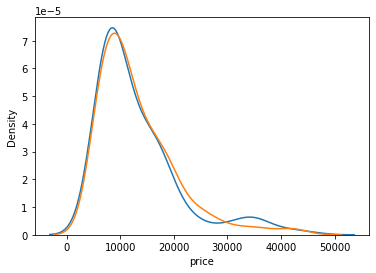

In [114]:
ax1 = sns.distplot(df['price'],hist = False, label = 'Actual Value')
sns.distplot(y_pred,hist = False, label = 'Fitted Values',ax = ax1)

#Câu 9.  Thiết kế một pipeline để phát triển mô hình mô hình Polynomial Regression bậc 2 để dự đoán giá xe từ biến 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg'. Trong pipeline thực hiện các công việc sau: Normalize, Transform => feature, LinearRegression để Fit tìm mô hình. Xuất mô hình vừa  tìm được.

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [116]:
Input = [('scale', StandardScaler()),
         ('polynomial',PolynomialFeatures(include_bias = False,degree = 2)),
         ('model',LinearRegression())]

In [117]:
pipe = Pipeline(Input)

In [118]:
pipe.fit(x,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [145]:
ypipe = pipe.predict(x)

In [120]:
mse = mean_squared_error(y,ypipe,squared=False)

In [121]:
np.sqrt(mse)

55.74503741251856

In [122]:
r_squared = pipe.score(x, y)
r_squared * 100

84.63341969864729

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


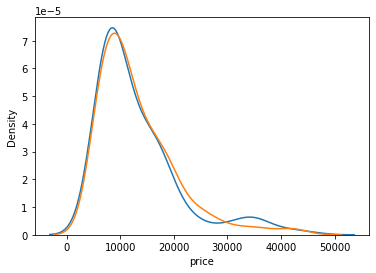

In [123]:
ax1 = sns.distplot(df['price'],hist = False,label = 'Actual Value')
sns.distplot(ypipe,hist = False,  label = 'Fitted Values',ax = ax1)

#Câu 10. Tìm khoảng giá trị chặn của các mô hình.

In [124]:
max(df['price'])

45400.0

In [125]:
min(df['price'])

5118.0

NX: Có thể xem giá trị max, min của bộ dữ liệu làm giá trị chắn của mô hình

#Câu 11. Xếp hạng các mô hình đã phát triển các câu trên.

Nhận xét: Mô hình hồi quy tuyến tính đa biến để dự đoán giá xe từ biến 'horsepower', 'curb-weight' 'engine-size', 'highway-mpg' sử dụng mô hình hình Polynomial Regression bậc 3 (câu 5) có giá trị tốt hơn các câu còn lại độ lỗi thấp và độ đo r^2 cao hơn 

==> Vậy các biến quan trọng là 'horsepower', 'curb-weight' 'engine-size', 'highway-mpg'

# Câu 12. *Anh/chị có thể phát triển một mô hình nào khác tốt hơn các mô hình đã phát triển bên trên. Nếu có thì chứng minh mô hình của bạn là tốt hơn?

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
def Function( num,model,*args):
  Input = [('scale', StandardScaler()),
         ('polynomial',PolynomialFeatures(include_bias = False,degree = num)),
         ('model',model)]
  pipe = Pipeline(Input)
  d = []
  for value in args:
        d.append(value)
  z = df[d]
  pipe.fit(z,df['price'])
  Y_pred = pipe.predict(z)
  return Y_pred

Hai biến


In [128]:
y_pred = Function(2,LogisticRegression(),'curb-weight','engine-size' )

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [129]:
mse = mean_squared_error(y,y_pred,squared=False)

In [130]:
np.sqrt(mse)

59.84852088836113

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


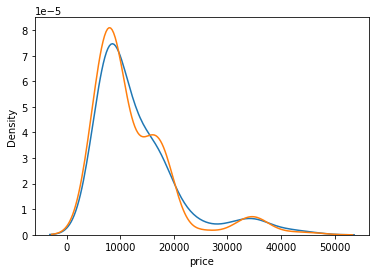

In [131]:
ax1 = sns.distplot(df['price'],hist = False,label = 'Actual Value')
sns.distplot(y_pred,hist = False,  label = 'Fitted Values',ax = ax1)

Mười biến

In [132]:
y_pred = Function(3,LogisticRegression(),'curb-weight','engine-size', 'length',
               'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [133]:
mse = mean_squared_error(y,y_pred,squared=False)

In [134]:
np.sqrt(mse)

32.88944792985634

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


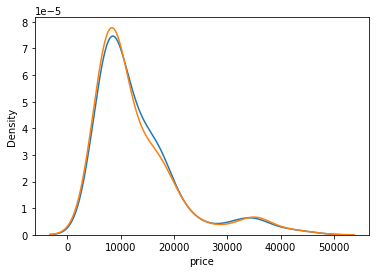

In [135]:
ax1 = sns.distplot(df['price'],hist = False, label = 'Actual Value')
sns.distplot(y_pred,hist = False, label = 'Fitted Values',ax = ax1)

#Câu 13. Viết hàm trả về kết quả dự đoán từ một hoặc nhiều feature thuộc 'curb-weight', 'engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel- base', 'bore'.

In [136]:
def Function(*args):
  Input = [('scale', StandardScaler()),
         ('polynomial',PolynomialFeatures(include_bias = False,degree = 3)),
         ('model',LinearRegression())]
  pipe = Pipeline(Input)
  d = []
  for value in args:
        d.append(value)
  z = df[d]
  pipe.fit(z,df['price'])
  Y_pred = pipe.predict(z)
  return Y_pred

Nhiều biến

In [137]:
y_pred2 = Function('curb-weight','engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore')

In [138]:
mse = mean_squared_error(y,y_pred2,squared=False)

In [139]:
np.sqrt(mse)

17.10615557912176

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


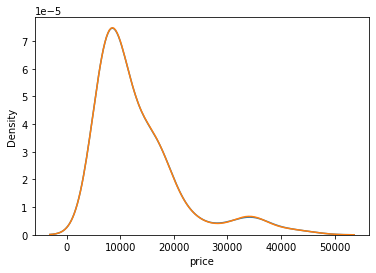

In [140]:
ax1 = sns.distplot(df['price'],hist = False, label = 'Actual Value')
sns.distplot(y_pred2,hist = False,  label = 'Fitted Values',ax = ax1)

Một biến 

In [141]:
y_pred3 = Function('engine-size')

In [142]:
mse = mean_squared_error(y,y_pred3,squared=False)

In [143]:
np.sqrt(mse)

60.26124721909316

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


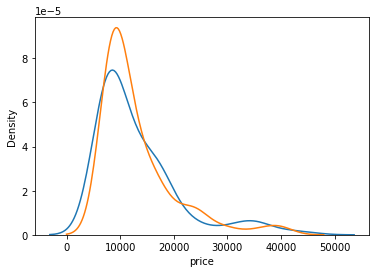

In [144]:
ax1 = sns.distplot(df['price'],hist = False, label = 'Actual Value')
sns.distplot(y_pred3,hist = False,  label = 'Fitted Values',ax = ax1)